<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# anaconda 환경 불러오기
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

In [ ]:
!conda install -y subread

In [5]:
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

In [6]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [7]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


In [8]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


In [9]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418


In [10]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000102693
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000064842
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN,ENSMUSG00000051951
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN,ENSMUSG00000102851
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN,ENSMUSG00000103377


In [11]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = filtered_data[['gene_id']] 
subset.to_csv('output_gene_id.txt', sep='\t', index=False)

In [12]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t')
GO_term

,From,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...,...
17910,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
17911,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
17912,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4
17913,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5


In [13]:
# gene_id column을 추가
GO_term['gene_id'] = GO_term['From']
GO_term

,From,Entry,Gene Ontology (GO),Entry Name,Gene Names,gene_id
0,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a,ENSMUSG00000025903
1,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1,ENSMUSG00000025903
2,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1,ENSMUSG00000025903
3,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1,ENSMUSG00000025903
4,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1,ENSMUSG00000025903
...,...,...,...,...,...,...
17910,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2,ENSMUSG00000064345
17911,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1,ENSMUSG00000064351
17912,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4,ENSMUSG00000064363
17913,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5,ENSMUSG00000064367


In [14]:
merged_GO = pd.merge(filtered_data, GO_term, on='gene_id')
merged_GO

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,From,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,ENSMUSG00000025903,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,ENSMUSG00000025903,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,ENSMUSG00000025903,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,ENSMUSG00000025903,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,ENSMUSG00000025903,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,chrM,3914,4951,+,1038,269,0,1253,3021,3012,2975,2156,0.214685,1.375759,ENSMUSG00000064345,ENSMUSG00000064345,P03893,mitochondrial inner membrane [GO:0005743]; mit...,NU2M_MOUSE,mt-Nd2 Nd2
17911,chrM,5328,6872,+,1545,533,0,16638,50576,39430,21253,17355,0.032035,0.954724,ENSMUSG00000064351,ENSMUSG00000064351,P00397,mitochondrial inner membrane [GO:0005743]; mit...,COX1_MOUSE,Mtco1 COI mt-Co1
17912,chrM,10167,11544,+,1378,373,0,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,ENSMUSG00000064363,P03911,mitochondrial inner membrane [GO:0005743]; mit...,NU4M_MOUSE,Mtnd4 mt-Nd4 Nd4
17913,chrM,11742,13565,+,1824,3665,0,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,ENSMUSG00000064367,P03921,mitochondrial inner membrane [GO:0005743]; mit...,NU5M_MOUSE,Mtnd5 mt-Nd5 Nd5


In [15]:
#merged_GO에서 원하는 column만 보이게 하고, NaN으로 표시된 GO term 행은 삭제.
subsets_GO = merged_GO[['gene_id', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO = subsets_GO.dropna(subset=['Gene Ontology (GO)'])
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface [GO:0009986]; cytoplasm [GO:00057...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity [GO:0016787]
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane [GO:0005743]; mit...


In [16]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface; cytoplasm; cytosol; endoplasmic ...
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,3.562718,0.760459,hydrolase activity
...,...,...,...
ENSMUSG00000064345,0.214685,1.375759,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064351,0.032035,0.954724,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064363,0.173488,1.107123,mitochondrial inner membrane; mitochondrial re...


In [17]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.strip() # 앞 뒤로 공백 있는 것 제거.
subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface
ENSMUSG00000025903,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,3.562718,0.760459,cytosol
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,3.562718,0.760459,mitochondrion
...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...
ENSMUSG00000064368,0.843117,1.263780,response to cocaine


In [ ]:
# 공백 제대로 제거 되었는지 확인
filtered_subsets_GO = subsets_GO.groupby('Gene Ontology (GO)').filter(lambda x: len(x) >= 10)
filtered_subsets_GO['Gene Ontology (GO)'].value_counts()

In [19]:
#GO_term에 따라 clip-enrichment값과 rden_change값이 Mann-Whitney U test를 통해 제대로 차이가 있는 것인지 확인.
import scipy.stats as stats

filtered_subsets_GO_stat = filtered_subsets_GO.groupby('Gene Ontology (GO)')

# 그룹별로 통계 진행
for Gene_Ontology, group_df in filtered_subsets_GO_stat:
  # 같은 Gene Ontology (GO) 값을 가지는 행만 선택
  same_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['clip_enrichment']
  same_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology]['rden_change']
  
  # 다른 Gene Ontology (GO) 값을 가지는 행 선택
  other_GO_clip = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['clip_enrichment']
  other_GO_rden = filtered_subsets_GO[filtered_subsets_GO['Gene Ontology (GO)'] != Gene_Ontology]['rden_change']
  
  # Mann-Whitney U 테스트 수행
  statistic_clip, p_value_clip = stats.mannwhitneyu(same_GO_clip, other_GO_clip)
  statistic_rden, p_value_rden = stats.mannwhitneyu(same_GO_rden, other_GO_rden)
    

  # filtered_subsets_GO에 열 추가
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'clip_enrichment_p-value'] = p_value_clip
  filtered_subsets_GO.loc[filtered_subsets_GO['Gene Ontology (GO)'] == Gene_Ontology, 'rden_change_p-value'] = p_value_rden

In [20]:
filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value
gene_id,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.544544e-14,4.878895e-32
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,9.772579e-15,8.988739e-14
ENSMUSG00000025903,3.562718,0.760459,cytosol,4.309365e-10,4.102518e-14
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,1.110729e-30,2.470793e-58
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,3.326024e-04,4.364510e-07
...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...,4.761494e-01,3.166181e-06
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...,9.917948e-01,1.100012e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,9.016877e-01,1.303477e-01


In [21]:
# fdr 구하기
from statsmodels.stats import multitest

# clip_enrichment_p-value,rden_change_p-value 값들의 배열
clip_p_values = filtered_subsets_GO['clip_enrichment_p-value'].values
rden_p_values = filtered_subsets_GO['rden_change_p-value'].values

# clip_enrichment_p-value, rden_change_p-value에 대한 FDR 계산
reject_clip, fdr_corrected_p_values_clip, _, _ = multitest.multipletests(clip_p_values, method='fdr_bh')
reject_rden, fdr_corrected_p_values_rden, _, _ = multitest.multipletests(rden_p_values, method='fdr_bh')

# 조정된 p-value를 filtered_subsets_GO에 추가
filtered_subsets_GO['clip_enrichment_fdr'] = fdr_corrected_p_values_clip
filtered_subsets_GO['rden_change_fdr'] = fdr_corrected_p_values_rden

filtered_subsets_GO

,clip_enrichment,rden_change,Gene Ontology (GO),clip_enrichment_p-value,rden_change_p-value,clip_enrichment_fdr,rden_change_fdr
gene_id,,,,,,,
ENSMUSG00000025903,3.562718,0.760459,cell surface,3.544544e-14,4.878895e-32,3.894593e-13,5.155852e-31
ENSMUSG00000025903,3.562718,0.760459,cytoplasm,9.772579e-15,8.988739e-14,1.169835e-13,4.467155e-13
ENSMUSG00000025903,3.562718,0.760459,cytosol,4.309365e-10,4.102518e-14,3.699824e-09,2.485410e-13
ENSMUSG00000025903,3.562718,0.760459,endoplasmic reticulum,1.110729e-30,2.470793e-58,3.498376e-29,7.096077e-57
ENSMUSG00000025903,3.562718,0.760459,mitochondrion,3.326024e-04,4.364510e-07,1.518451e-03,1.530822e-06
...,...,...,...,...,...,...,...
ENSMUSG00000064368,0.843117,1.263780,mitochondrial respiratory chain complex I asse...,4.761494e-01,3.166181e-06,6.253346e-01,1.036961e-05
ENSMUSG00000064368,0.843117,1.263780,proton motive force-driven mitochondrial ATP s...,9.917948e-01,1.100012e-05,9.951075e-01,3.544749e-05
ENSMUSG00000064368,0.843117,1.263780,response to cocaine,9.016877e-01,1.303477e-01,9.345676e-01,2.027036e-01


In [22]:
GO_heatmap = pd.DataFrame()
GO_heatmap['Gene Ontology (GO)'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['Gene Ontology (GO)'].first().index
GO_heatmap['clip_enrichment_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment'].mean().values
GO_heatmap['rden_change_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change'].mean().values
GO_heatmap['clip_enrichment_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['clip_enrichment_fdr'].mean().values
GO_heatmap['rden_change_fdr_mean'] = filtered_subsets_GO.groupby('Gene Ontology (GO)')['rden_change_fdr'].mean().values
GO_heatmap['GO_count'] = filtered_subsets_GO.groupby('Gene Ontology (GO)').size().values
GO_heatmap

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic p...,0.880241,0.402783,0.002598,3.135269e-02,11
1,1-alkyl-2-acetylglycerophosphocholine esterase...,4.723211,0.905880,0.278730,4.842749e-02,10
2,1-phosphatidylinositol binding,2.218695,0.516430,0.390938,9.029373e-01,11
3,14-3-3 protein binding,1.558546,0.475321,0.121326,1.143816e-01,24
4,"2 iron, 2 sulfur cluster binding",1.707135,0.724828,0.408919,8.985027e-02,10
...,...,...,...,...,...,...
2346,"wound healing, spreading of cells",2.514951,0.618794,0.476810,5.245250e-01,11
2347,xenobiotic transmembrane transporter activity,3.142050,1.065632,0.078169,1.315535e-06,15
2348,zinc ion binding,2.050822,0.537207,0.007203,7.129586e-04,542
2349,zinc ion transmembrane transporter activity,5.443065,0.965965,0.000024,6.066743e-08,18


In [23]:
#GO_heatmap의 clip_enrichment_fdr이 0.05미만인 것들만 추리기
GO_heatmap_filtered = GO_heatmap[GO_heatmap['clip_enrichment_fdr_mean'] <= 0.05]
GO_heatmap_filtered

,Gene Ontology (GO),clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
0,'de novo' pyrimidine nucleobase biosynthetic p...,0.880241,0.402783,2.598286e-03,3.135269e-02,11
20,ATP hydrolysis activity,2.972289,0.544586,6.612469e-03,4.715213e-03,275
23,ATP-dependent FeS chaperone activity,0.443154,0.488725,5.996815e-07,6.039503e-01,12
25,ATP-dependent chromatin remodeler activity,3.237061,0.476057,2.559673e-03,5.273169e-02,39
28,ATPase binding,2.809818,0.603192,2.895536e-02,6.243224e-01,56
...,...,...,...,...,...,...
2341,voltage-gated chloride channel activity,4.418170,1.004253,2.852153e-03,3.413721e-06,13
2345,wound healing,3.181848,0.719418,3.023036e-02,1.902994e-04,42
2348,zinc ion binding,2.050822,0.537207,7.202525e-03,7.129586e-04,542
2349,zinc ion transmembrane transporter activity,5.443065,0.965965,2.411534e-05,6.066743e-08,18


In [35]:
# GO_count의 수가 너무 많은데, 이게 정상적인 숫자인지..? 맞음
GO_heatmap_sorted = GO_heatmap_filtered.sort_values(by='GO_count', ascending=True)
GO_heatmap_sorted = GO_heatmap_sorted.set_index('Gene Ontology (GO)')
GO_heatmap_sorted

,clip_enrichment_mean,rden_change_mean,clip_enrichment_fdr_mean,rden_change_fdr_mean,GO_count
Gene Ontology (GO),,,,,
mitophagy,1.046534,0.565453,3.108015e-02,9.074858e-01,10
monoatomic cation transmembrane transporter activity,4.550940,0.979336,2.441817e-02,1.264026e-04,10
lysosomal transport,4.424521,0.845803,2.867277e-02,1.951704e-02,10
perinuclear endoplasmic reticulum,5.282079,0.850924,1.574348e-02,2.959748e-02,10
long-chain fatty acid-CoA ligase activity,5.369286,0.669957,4.956803e-03,8.287274e-02,10
...,...,...,...,...,...
nucleoplasm,2.220387,0.512079,3.487300e-06,1.215947e-24,1889
cytosol,2.097193,0.526483,3.699824e-09,2.485410e-13,2105
membrane,3.483642,0.849871,7.622601e-77,0.000000e+00,2274


각 GO term에서 해당하는 CLIP_Enrichment, rden_change에서의 값이 GO term에 해당하지 않는 값들과 비교했을 때 유의미한 차이가 있는지 확인하는게 Mann-Whitney U test임. 그래서 이걸 먼저 해서, 각 p-value를 구한 다음, 거기서 fdr을 구해서 그 값들에 대해서 heatmap dot plot을 그리면 됨.
(교수님이 phythonpy에 굉장히 편리한 Mann-Whitney U test가 있다고 함)

추가적으로 dot이 많이 나오는데, 여기서 10개 이상으로 제한을 두거나, 25 이상을 제한을 두거나 해서 그림을 그리면 됨.
그 후 fdr값을 기준으로 진하기를 표시하고 상위13개 GO_count 값만 표현하면괜찮을 것 같음..

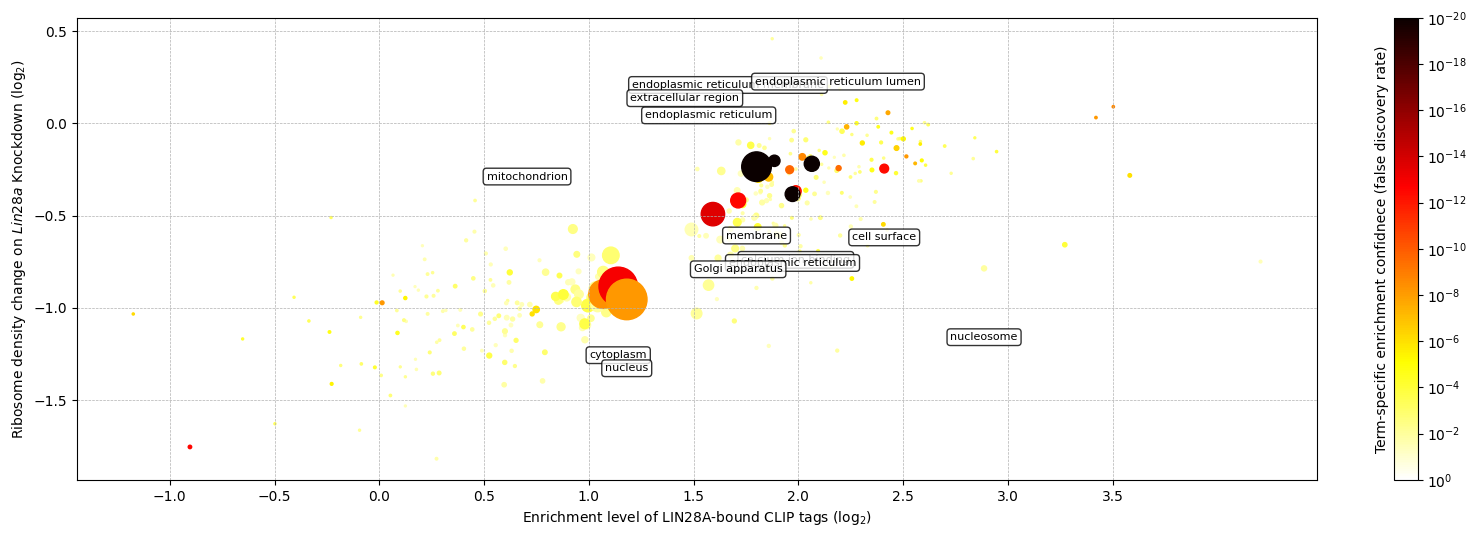

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import seaborn as sns

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count']/5
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']

# 그래프 그리기
plt.figure(figsize=(20, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10**-20, vmax=10**-0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10**-i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidnece (false discovery rate)')

# 여러 인덱스에 해당하는 값 텍스트 표시 (오른쪽)
GO_term_graph = ['cytoplasm','nucleus','calcium ion binding','membrane','nucleosome',
                 'endoplasmic reticulum','cell surface', 'Golgi apparatus','glycoaminoglycan metabolic process',
                 'nucleosome assembly']
text_offset = 0.4
for target_index in GO_term_graph:
    if target_index in GO_heatmap_sorted.index:
        target_x = x[GO_heatmap_sorted.index == target_index]
        target_y = y[GO_heatmap_sorted.index == target_index]
        plt.text(target_x, target_y - text_offset, target_index, ha='center', va='bottom', fontsize=8,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))

# 여러 인덱스에 해당하는 값 텍스트 표시 (왼쪽)
GO_term_graph = ['endoplasmic reticulum','endoplasmic reticulum membrane', 'extracellular region','mitochondrion','endoplasmic reticulum lumen']
text_offset = 0.4
for target_index in GO_term_graph:
    if target_index in GO_heatmap_sorted.index:
        target_x = x[GO_heatmap_sorted.index == target_index]
        target_y = y[GO_heatmap_sorted.index == target_index]
        plt.text(target_x-text_offset, target_y + text_offset, target_index, ha='center', va='bottom', fontsize=8,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))

plt.xticks(np.arange(-1, 4, 0.5))
plt.grid(True, linestyle='--', linewidth=.5)

plt.show()

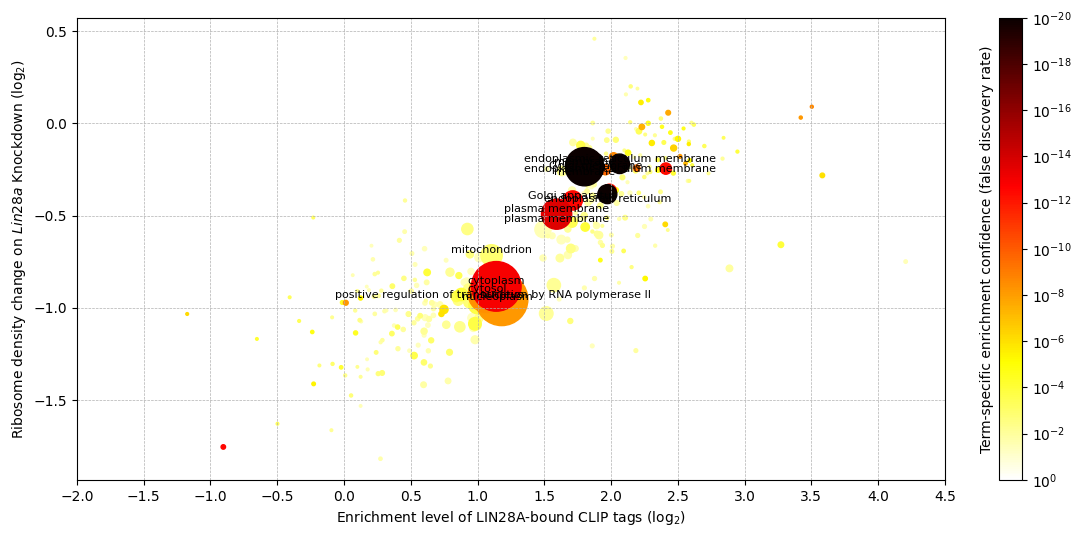

In [26]:
# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10**-20, vmax=10**-0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10**-i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

top_size_indices = np.argsort(size)[-10:]  # size가 가장 큰 10개의 인덱스
top_color_indices = np.argsort(color)[:5]  # color 값이 가장 작은 5개의 인덱스

# size가 가장 큰 10개의 text 표시
for i in top_size_indices:
    go_value = GO_heatmap_sorted.index[i]
    x_pos = x[i]
    y_pos = y[i]
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8)
top_10_indices = np.argsort(color)[:20]
text_positions = []  # 이미 표시된 text의 위치를 저장하는 리스트

for i in top_10_indices:
    go_value = GO_heatmap_sorted.index[i]
    
    # text의 위치를 설정합니다
    x_offset = 0.2 * np.random.uniform(-1, 1)  # x 방향 offset (random)
    y_offset = 0.2 * np.random.uniform(-1, 1)  # y 방향 offset (random)
    
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset
    
    # 겹치지 않는 위치를 찾을 때까지 반복합니다
    while True:
        is_overlapping = False
        for pos in text_positions:
            if abs(x_pos - pos[0]) < 0.5 and abs(y_pos - pos[1]) < 0.5:
                is_overlapping = True
                break
        if is_overlapping:
            # 겹치는 경우 새로운 위치를 생성합니다
            x_offset = np.random.uniform(-1, 1)
            y_offset = np.random.uniform(-1, 1)
            
            x_pos = x[i] + x_offset
            y_pos = y[i] + y_offset
        else:
            break
    
    text_positions.append((x_pos, y_pos))
# color 값이 가장 작은 5개의 text 표시
for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    x_pos = x[i]
    y_pos = y[i]
    plt.text(x_pos, y_pos, go_value, ha='center', va='top', fontsize=8)

plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=.5)

plt.show()


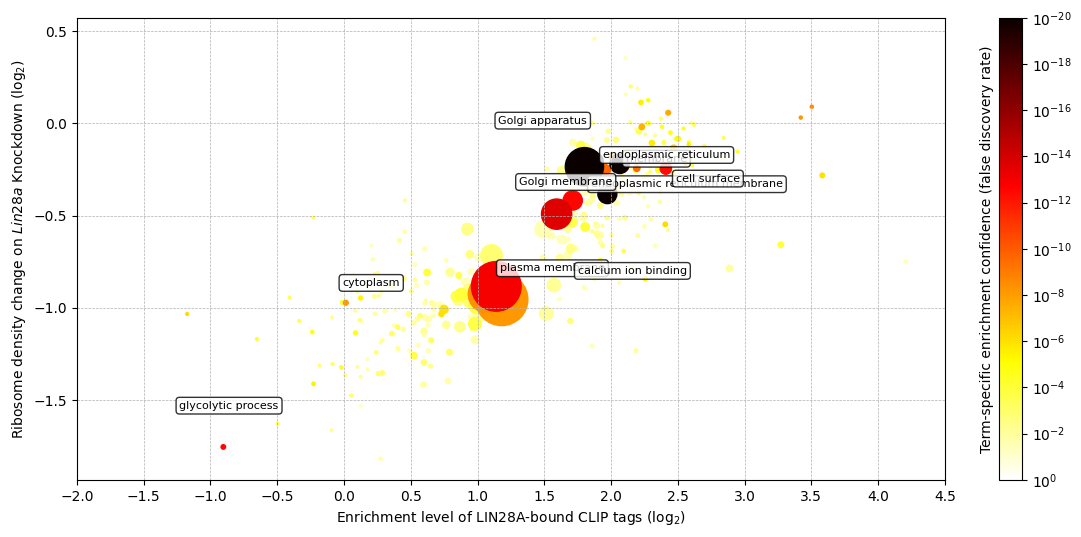

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count'] / 3
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']

# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10 ** -20, vmax=10 ** -0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10 ** -i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

# size가 큰 10개와 color 값이 작은 10개의 데이터에 대해 text 표시
top_size_indices = np.argsort(size)[-15:]  # size가 큰 10개의 인덱스
top_color_indices = np.argsort(color)[:10]  # color 값이 작은 10개의 인덱스

for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    # 텍스트를 표시할 위치 랜덤 생성
    x_offset = random.uniform(-1, 1)
    y_offset = random.uniform(-0.5, 0.5)
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset 
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))


plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

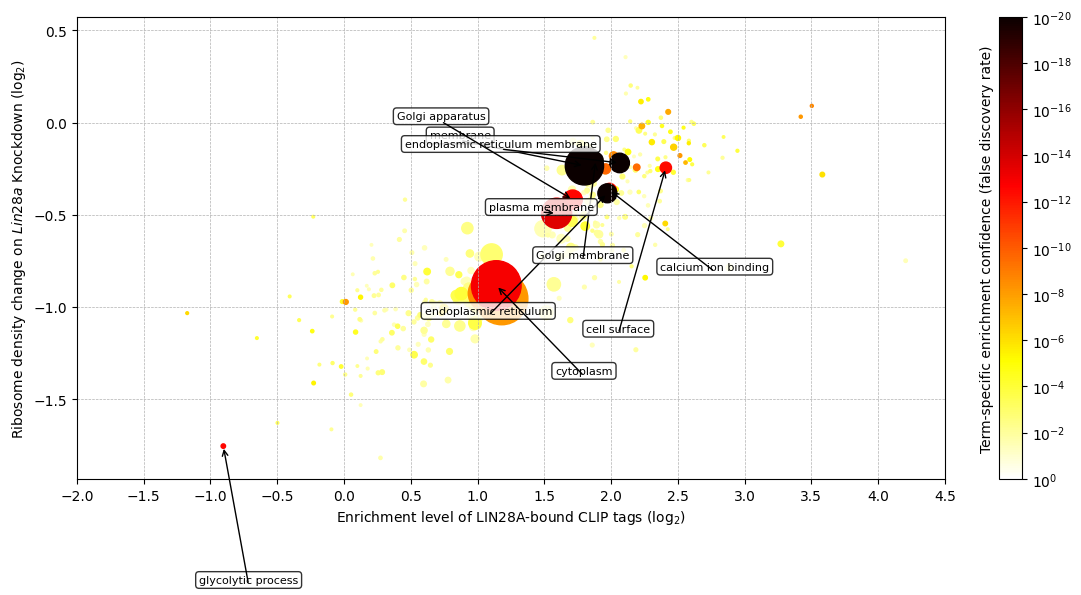

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import random

# 데이터프레임에서 필요한 열 선택
x = np.log2(GO_heatmap_sorted['clip_enrichment_mean'])
y = np.log2(GO_heatmap_sorted['rden_change_mean'])
size = GO_heatmap_sorted['GO_count'] / 3
color = GO_heatmap_sorted['clip_enrichment_fdr_mean']

# 그래프 그리기
plt.figure(figsize=(14, 6))
scatter_plot = plt.scatter(x, y, s=size, c=color, cmap='hot', norm=LogNorm(vmin=10 ** -20, vmax=10 ** -0))
plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log$_{2}$)")
plt.ylabel("Ribosome density change on $\it{Lin28a}$ Knockdown (log$_{2}$)")

# Colorbar 설정
cbar = plt.colorbar(scatter_plot)
cbar.set_ticks([10 ** -i for i in range(0, 21, 2)])
cbar.ax.yaxis.set_label_position('left')
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Term-specific enrichment confidence (false discovery rate)')

# size가 큰 데이터에 대해 text와 애로우 표시
top_size_indices = np.argsort(color)[:10]  # size가 큰 10개의 인덱스

for i in top_color_indices:
    go_value = GO_heatmap_sorted.index[i]
    # 텍스트를 표시할 위치 랜덤 생성
    x_offset = random.uniform(-1, 1)
    y_offset = random.uniform(-1, 1)
    x_pos = x[i] + x_offset
    y_pos = y[i] + y_offset

    # 텍스트 표시
    plt.text(x_pos, y_pos, go_value, ha='center', va='bottom', fontsize=8,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.8))

    # 애로우 표시
    arrow_start = (x_pos, y_pos)
    arrow_end = (x[i], y[i])
    plt.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(arrowstyle='->', color='black'))

plt.xticks(np.arange(-2, 5, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

NameError: ignored